# This jupyter notebook is prepared by “Yuyang Zhang”.

# 1. Load Data and perform basic EDA (4pts total)

### 1.1 import libraries: numpy, pandas, matplotlib.pyplot, seaborn, sklearn (1pt)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# TODO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### 1.2 Upload the dataset to your Google Drive, then using the following code, import the data to a pandas dataframe and show the count of rows and columns (0.5pt)

In [23]:
from google.colab import drive

file_name = '/content/drive/MyDrive/hr_data_.csv' #you may need to change this line depending on the location of your file in Google Drive
with open(file_name, 'r') as file:
 df = pd.read_csv(file_name)
df.shape


(8955, 15)

### 1.3 Show the top 7 and bottom 7 rows (0.5pt)

In [24]:
# TODO
print("Top 7 rows are: ")
print(df.head(7))
print("\n\nBot 7 rows are: ")
print(df.tail(7))

Top 7 rows are: 
   Unnamed: 0  enrollee_id      city  city_development_index gender  \
0           1        29725   city_40                   0.776   Male   
1           4          666  city_162                   0.767   Male   
2           7          402   city_46                   0.762   Male   
3           8        27107  city_103                   0.920   Male   
4          11        23853  city_103                   0.920   Male   
5          12        25619   city_61                   0.913   Male   
6          15         6588  city_114                   0.926   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment         Masters   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment        Graduate   
5  Has relevent ex

### 1.4 Show if any column has null values (0.5pt)

In [25]:
# TODO
print(df.isnull().sum())

Unnamed: 0                0
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


### 1.5 Show/Plot the count of unique target labels and discuss its imbalances and possible issues in using it for classification. (1.5pt)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


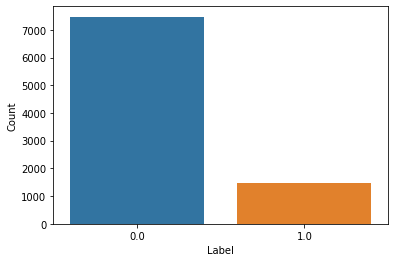

'\nIf the target labels are imbalanced, this means that some target labels have significantly more \nsamples than others. Imbalanced datasets can lead to bias in classifiers that predict the majority class\n'

In [26]:
# TODO
target_counts = df['target'].value_counts()
sns.barplot(target_counts.index, target_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

'''
If the target labels are imbalanced, this means that some target labels have significantly more 
samples than others. Imbalanced datasets can lead to bias in classifiers that predict the majority class
'''

# 2. Feature Selection and Pre-processing (25 pts total)

## 2.1 Preprocessing City (1+1+1+1 = 4pts total)

### 2.1.1 Plot no. of records per city so that the highest city counts are shown in descending order (1pt)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


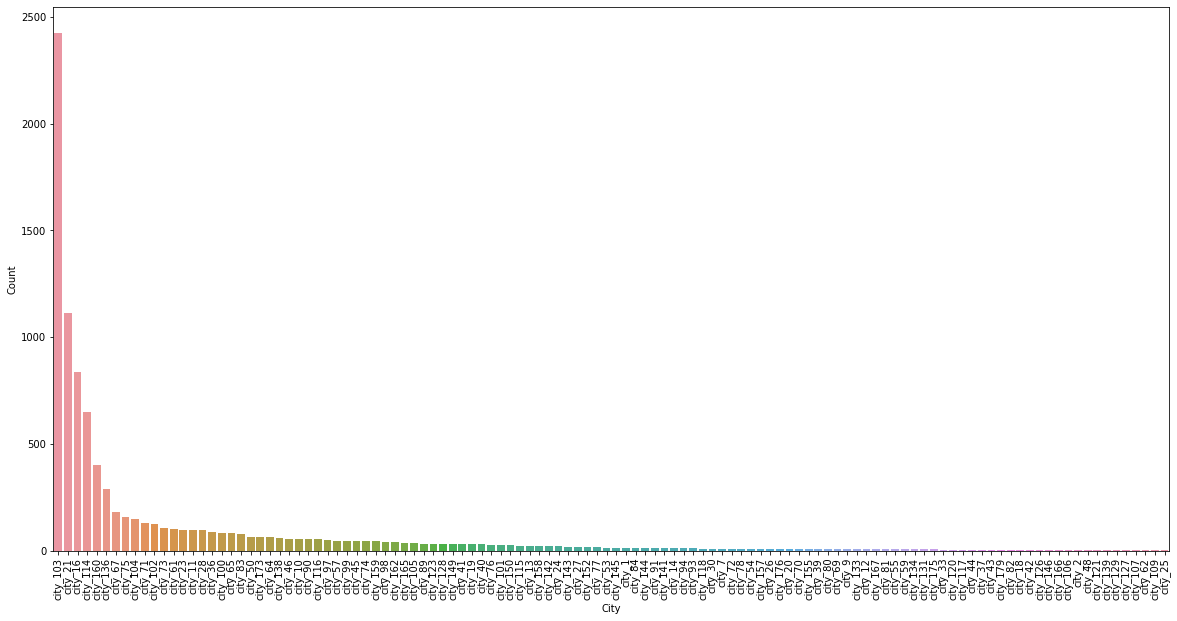

In [27]:
# TODO
plt.figure(figsize = (20, 10))
city_counts = df['city'].value_counts().sort_values(ascending = False)
sns.barplot(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### 2.1.2 How many rows belong to the count-wise top 4 cities in total and how many for the remaining? (1pt)

In [28]:
# TODO
city_counts = df['city'].value_counts()
top4_rows = city_counts[:4].sum()
remain_rows = city_counts[4:].sum()
print("Rows belong to the top 4 cities:", top4_rows)
print("Rows belong to the remaining cities:", remain_rows)

Rows belong to the top 4 cities: 5021
Rows belong to the remaining cities: 3934


### 2.1.3 Replace the city name with city_others if the city name is not among the top 4 (1pt)

In [29]:
# TODO
city_counts = df['city'].value_counts()
top4 = city_counts[:4].index.tolist()
df['city'] = np.where(df['city'].isin(top4), df['city'], "city_others")

### 2.1.4 Show some sample data that the records have changed correctly. (1pt)

In [30]:
# TODO
print(df.head(7))

   Unnamed: 0  enrollee_id         city  city_development_index gender  \
0           1        29725  city_others                   0.776   Male   
1           4          666  city_others                   0.767   Male   
2           7          402  city_others                   0.762   Male   
3           8        27107     city_103                   0.920   Male   
4          11        23853     city_103                   0.920   Male   
5          12        25619  city_others                   0.913   Male   
6          15         6588     city_114                   0.926   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment         Masters   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment        Graduate   
5  Has rele

## 2.2. Preprocessing Education Level (1+2+2+1 = 6pts total)

### 2.2.1. Show the unique values of education level. (1pt)

In [31]:
#TODO
print("Unique values of education level:", df['education_level'].unique())

Unique values of education level: ['Graduate' 'Masters' 'Phd']


### 2.2.2. Write a function named replace_labels() that can replace labels using given {old_label:new_label} dictionary (2pts)

Parameters: (1) dataframe, (2) a column name, (3) a dictionary with {old_label:new_label} mapping. 

Returns: a dataframe with specified column values replaced with the  


In [32]:
# TODO
def replace_labels(df, col, mapping):
  df[col] = df[col].map(mapping)
  return df

### 2.2.3. Using the replace_labels() function you just created, replace education_level column with ordinal values. The mapping can be like "Graduate":0, "Masters":1, "Phd":2 . (2pt)

In [33]:
# TODO
education_mapping = {"Graduate": 0, "Masters": 1, "Phd": 2}
df = replace_labels(df, "education_level", education_mapping)

### 2.2.4 Show some sample data that the records have changed appropriately (1pt)

In [34]:
# TODO
print(df.head(7))

   Unnamed: 0  enrollee_id         city  city_development_index gender  \
0           1        29725  city_others                   0.776   Male   
1           4          666  city_others                   0.767   Male   
2           7          402  city_others                   0.762   Male   
3           8        27107     city_103                   0.920   Male   
4          11        23853     city_103                   0.920   Male   
5          12        25619  city_others                   0.913   Male   
6          15         6588     city_114                   0.926   Male   

       relevent_experience enrolled_university  education_level  \
0   No relevent experience       no_enrollment                0   
1  Has relevent experience       no_enrollment                1   
2  Has relevent experience       no_enrollment                0   
3  Has relevent experience       no_enrollment                0   
4  Has relevent experience       no_enrollment                0   
5  Ha

## 2.3. Preprocessing company_size (2+2+1 = 5pts total)

### 2.3.1 Show the unique values of the company_size column and their counts (2pt)

In [35]:
# TODO
print(df['company_size'].value_counts())

50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64


### 2.3.2 Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable. (2pt)
(Hint: you can use the replace_labels() function you created before.)

In [36]:
# TODO
company_size_mapping = {"<10": 0, "10/49": 1, "50-99": 2, "100-500": 3, "500-999": 4, "1000-4999": 5, "5000-9999": 6, "10000+": 7}
df = replace_labels(df, "company_size", company_size_mapping)

### 2.3.3 Show the updated unique values to validate they changed appropriately (1pt)

In [37]:
# TODO
print(df['company_size'].unique())
print(df.head(7))

[2 0 6 5 1 3 7 4]
   Unnamed: 0  enrollee_id         city  city_development_index gender  \
0           1        29725  city_others                   0.776   Male   
1           4          666  city_others                   0.767   Male   
2           7          402  city_others                   0.762   Male   
3           8        27107     city_103                   0.920   Male   
4          11        23853     city_103                   0.920   Male   
5          12        25619  city_others                   0.913   Male   
6          15         6588     city_114                   0.926   Male   

       relevent_experience enrolled_university  education_level  \
0   No relevent experience       no_enrollment                0   
1  Has relevent experience       no_enrollment                1   
2  Has relevent experience       no_enrollment                0   
3  Has relevent experience       no_enrollment                0   
4  Has relevent experience       no_enrollment        

## 2.4. Preprocessing last_new_job (1+2+1 = 4pts total)

### 2.4.1 Show unique values of the last_new_job column (1pt)

In [38]:
# TODO
print(df['last_new_job'].unique())

['>4' '4' '1' '3' '2' 'never']


### 2.4.2 Convert the values of this column to never->0, 1->1,....>4 -->5 (2pt)
Hint: replace_labels()

In [39]:
# TODO
last_new_job_mapping = {"never": 0, "1": 1, "2": 2, "3": 3, "4": 4, ">4": 5}
df = replace_labels(df, 'last_new_job', last_new_job_mapping)

### 2.4.3 Show the updated values (1pt)

In [40]:
# TODO
print(df['last_new_job'].unique())

[5 4 1 3 2 0]


## 2.5 Preprocessing other columns (2pt total)

### 2.5.1 Drop the enrollee_id, any unnamed columns, and any duplicate columns (if you created multiple columns one with original and one with updated, then remove the original one) (2pt)

In [41]:
# TODO
df.drop(columns = ["enrollee_id"], inplace = True)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)], axis = 1, inplace = True)
df.drop(df.columns[df.columns.duplicated()], inplace = True)

## 2.6 Feature Scaling (3+1 = 4ps total)

### 2.6.1 Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the numeric columns (3pt)

In [42]:
# TODO
from sklearn.preprocessing import MinMaxScaler
numeric = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df[numeric] = scaler.fit_transform(df[numeric])

### 2.6.2 Show some of the scaled records. (1pt)

In [43]:
# TODO
print(df.head(7))

          city  city_development_index gender      relevent_experience  \
0  city_others                0.654691   Male   No relevent experience   
1  city_others                0.636727   Male  Has relevent experience   
2  city_others                0.626747   Male  Has relevent experience   
3     city_103                0.942116   Male  Has relevent experience   
4     city_103                0.942116   Male  Has relevent experience   
5  city_others                0.928144   Male  Has relevent experience   
6     city_114                0.954092   Male  Has relevent experience   

  enrolled_university  education_level major_discipline  experience  \
0       no_enrollment              0.0             STEM    0.714286   
1       no_enrollment              0.5             STEM    1.000000   
2       no_enrollment              0.0             STEM    0.619048   
3       no_enrollment              0.0             STEM    0.333333   
4       no_enrollment              0.0             S

# 3. X/Y and Training/Test Split with stratified sampling (15pts in total)

### 3.1 Using a lot of features with categorical values is not memory-efficient. Use a LabelEncoder() to convert all the categorical columns to numeric labels. (This task is similar to previous assignment A1) (2pt)

In [44]:
# TODO
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical = df.select_dtypes(include=['object']).columns
for x in categorical:
 df[x] = le.fit_transform(df[x])

### 3.2 Copy all the features into X and the target to Y (2pt)

In [45]:
# TODO
X = df.drop(['target'], axis=1)
Y = df['target']

### 3.3 Show the ratio of 1 and 0 in Y. (1pt)

In [46]:
# TODO
unique, counts = np.unique(Y, return_counts=True)
print(Y.value_counts(normalize=True))

0.0    0.834394
1.0    0.165606
Name: target, dtype: float64


### 3.4 Use sklearn's train_test_split() to split the data set into 70% training and 30% test sets. Set random_state to 42. We want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to Y to ensure this. Then show the ratio of 1 and 0 in both train and test target. (4pt)

In [47]:
# TODO
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
print("Train Target")
print(y_train.value_counts(normalize=True))

print("\nTest Target")
print(y_test.value_counts(normalize=True))

Train Target
0.0    0.834397
1.0    0.165603
Name: target, dtype: float64

Test Target
0.0    0.834388
1.0    0.165612
Name: target, dtype: float64


### 3.5 Rebalancing (4+2 = 6pts)

3.5.1 Use imblearn's SMOTENC to balance the x_train


When our training set have class imbalance, we often perform over-sampling to generate synthetic data that can help in training. SMOTE is a library by imblearn for this purpose. The usage is fairly straightforward. See documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) and a brief explanation with example [here](https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25)

In [48]:
# TODO
from imblearn.over_sampling import SMOTENC
smotenc = SMOTENC(sampling_strategy='minority', categorical_features=[0, 1, 2])
x_balance, y_balance = smotenc.fit_resample(x_train, y_train)

3.5.2 Did that change the ratio in label? Confirm by printing the ratio in resampled labels.

In [49]:
# TODO
# Changed to 0.5 for each
unique, counts = np.unique(y_balance, return_counts=True)
print(y_balance.value_counts(normalize=True))

0.0    0.5
1.0    0.5
Name: target, dtype: float64


# 4. Decision Tree (20pts total)

### 4.1 Initialize a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set. Set a consistent value for random_state parameter so that your result is reproducible. (1pt)

In [50]:
# TODO
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

### 4.2 Use grid search to find out the best combination of values for the parameters: criterion, max_depth, min_samples_split, max_features. Then print the best performing parameters. (4pt)

In [51]:
# TODO
from sklearn.model_selection import GridSearchCV
grid = {'criterion': ['gini', 'entropy'],
     'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
     'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
     'max_features': ['auto', 'log2', None]}
grid_search = GridSearchCV(dt, grid, cv=5)
grid_search.fit(x_train, y_train)
best = grid_search.best_params_
print("Best performing parameters:", best)

Best performing parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_split': 2}


### 4.3 Add the best performing parameter set to the already-initialized Decision Tree model. Then fit it on the train dataset. (2pt)

In [52]:
# TODO
dt = DecisionTreeClassifier(criterion=best['criterion'], 
               max_depth=best['max_depth'], 
               min_samples_split=best['min_samples_split'], 
               max_features=best['max_features'], 
               random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

### 4.4 Import the accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score from scikitlearn's metrics package. Evaluate your Decision Tree on the Test dataset and print all the metrics. (3pt)

In [53]:
# TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
y_pred = dt.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion_matrix)
print("F1 Score:", f1_score)
print("ROC-AUC Score:", roc_auc_score)

Accuracy: 0.8585783401563082
Precision: 0.5818639798488665
Recall: 0.5191011235955056
Confusion Matrix:
 [[2076  166]
 [ 214  231]]
F1 Score: 0.5486935866983373
ROC-AUC Score: 0.72253004440257


### 4.5 Plot the tree using scikitlearn's tree package. You may need to define a large figure size using matplotlib to have an intelligible figure. (2pt)

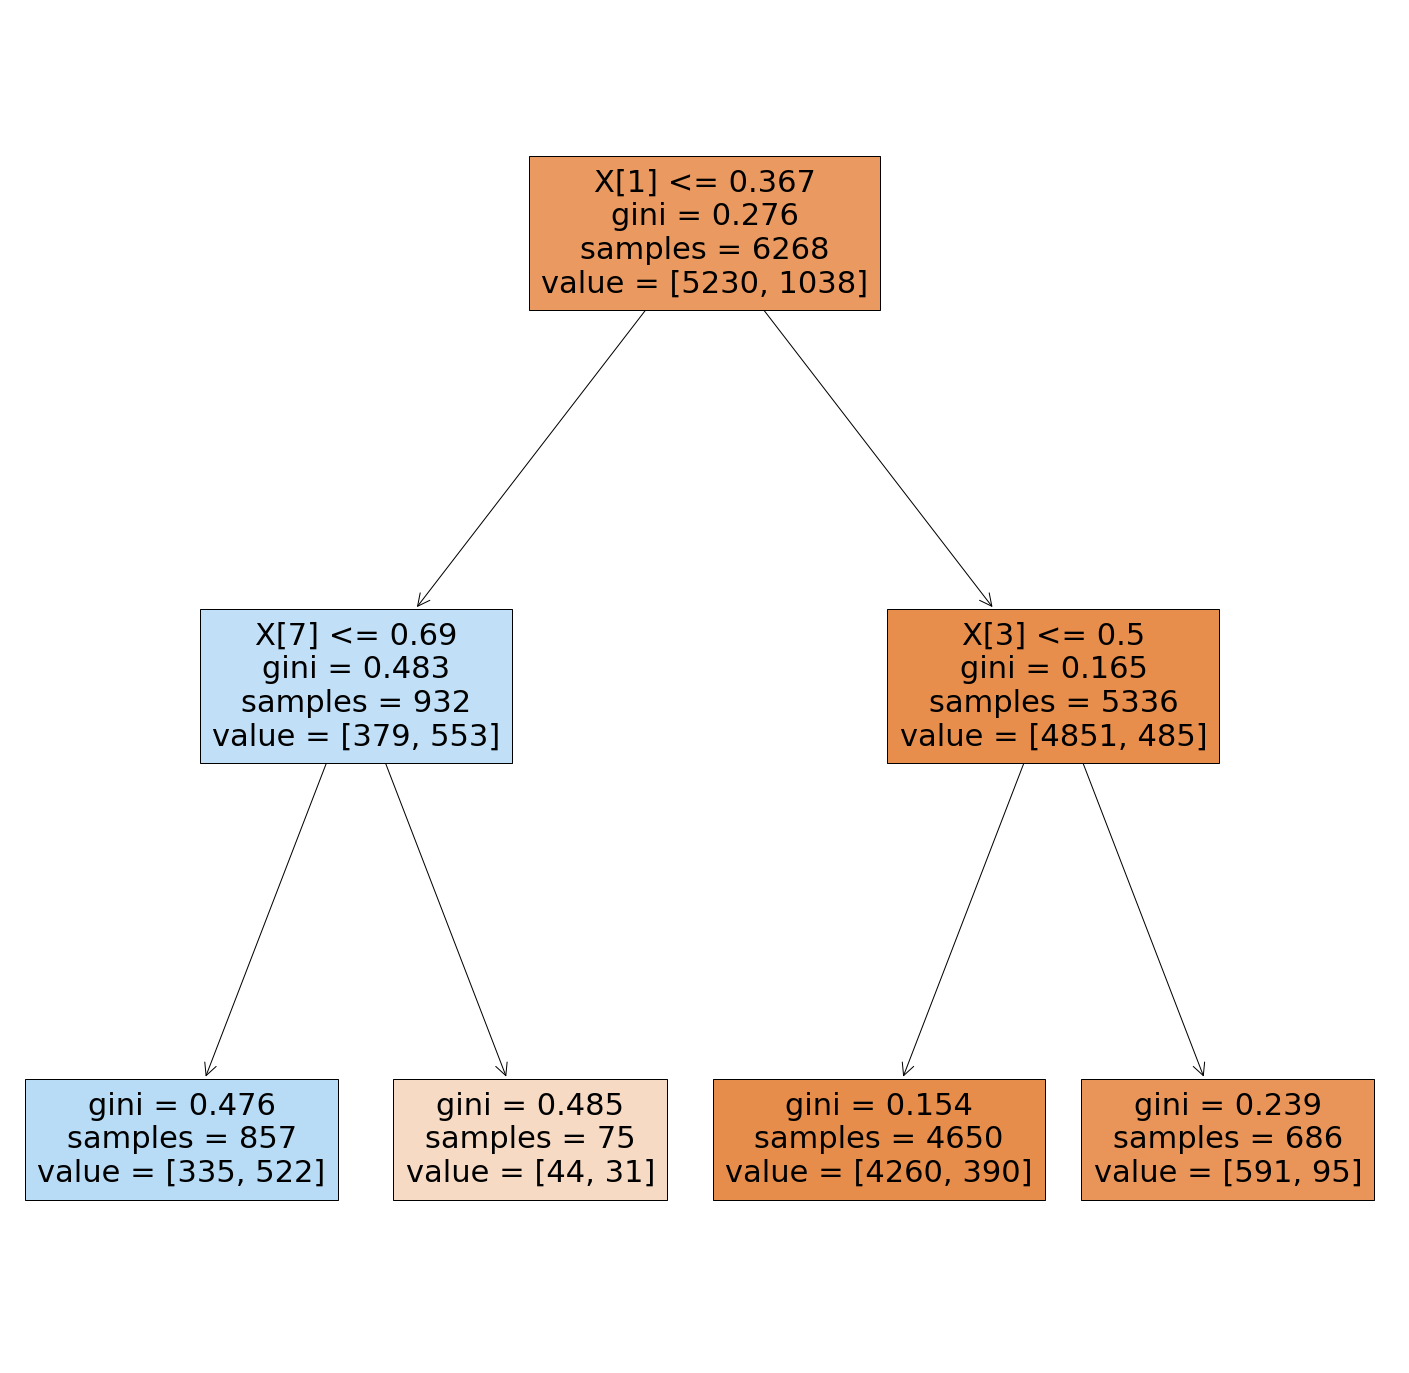

In [54]:
# TODO
from sklearn import tree
plt.figure(figsize=(25, 25))
tree.plot_tree(dt, filled=True)
plt.show()

### 4.6 Initialize a new Decision Tree model, then use the best set of parameters from Step 4.3 to train it on the balanced train set that you prepared in Step 3.5.1. (3pt)

In [55]:
# TODO
newdt = DecisionTreeClassifier(criterion=best['criterion'], 
               max_depth=best['max_depth'], 
               min_samples_split=best['min_samples_split'], 
               max_features=best['max_features'], 
               random_state=42)
newdt.fit(x_balance, y_balance)

DecisionTreeClassifier(max_depth=2, random_state=42)

### 4.7 Print the evaluation scores (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) from the training on balanced dataset. (3pt)

In [56]:
# TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

y_pred = newdt.predict(x_test)

acs = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ras = roc_auc_score(y_test, y_pred)

print("Accuracy: ", acs)
print("Precision: ", ps)
print("Recall: ", rs)
print("Confusion Matrix: \n", cm)
print("F1 Score: ", f1)
print("ROC AUC Score: ", ras)

Accuracy:  0.8585783401563082
Precision:  0.5764705882352941
Recall:  0.550561797752809
Confusion Matrix: 
 [[2062  180]
 [ 200  245]]
F1 Score:  0.5632183908045977
ROC AUC Score:  0.7351381691707846


### 4.8 Discuss any difference between evaluation results from the unbalanced train set and balanced train set. (2pt)

The recall from balanced train set has about 5% more than the recall from the  unbalanced train set.

# 5. Random Forest Classifier (12pts total)

### 5.1 Use grid search to find best combinations of the following Random Forest parameters: n_estimators, max_depth, min_samples_split and min_samples_leaf. Use your own choice of scoring, criterion, number of folds for cross-validation for the model initialization. Remember the grid search can take a while to finish. (4pt)

In [57]:
# TODO
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=42)

grid2 = {'n_estimators': [5, 10, 15],
     'max_depth': [2, 4, 6, 8, 10],
     'min_samples_split': [4, 6, 8, 10, 12],
     'min_samples_leaf': [1, 2, 3]}

grid_search = GridSearchCV(rfc, grid2, cv=5)
grid_search.fit(x_train, y_train)
best2 = grid_search.best_params_
print("Best parameters: ", best2)

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 10}


### 5.2 Print the best combination of parameters and use it to train a Random Forest classifier model. (3pt)

In [58]:
# TODO
print("Best parameters:", best2)

rfc = RandomForestClassifier(n_estimators=best2['n_estimators'],
                 max_depth=best2['max_depth'],
                 min_samples_split=best2['min_samples_split'],
                 min_samples_leaf=best2['min_samples_leaf'],
                 random_state=42)

rfc.fit(x_train, y_train)

Best parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 10}


RandomForestClassifier(max_depth=6, min_samples_split=8, n_estimators=10,
                       random_state=42)

### 5.3  Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (5pt)

In [59]:
# TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

y_pred = rfc.predict(x_test)

acs = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ras = roc_auc_score(y_test, y_pred)

print("Accuracy: ", acs)
print("Precision: ", ps)
print("Recall: ", rs)
print("Confusion Matrix: \n", cm)
print("F1 Score: ", f1)
print("ROC AUC Score: ", ras)

Accuracy:  0.854484555266096
Precision:  0.5718085106382979
Recall:  0.48314606741573035
Confusion Matrix: 
 [[2081  161]
 [ 230  215]]
F1 Score:  0.5237515225334958
ROC AUC Score:  0.7056675921378385


# 6. Boosting Classifier (20 pts total)

## 6.1 AdaBoost Classifier (10 pts total)

### 6.1.1 Perform a grid search for best values for parameters={n_estimators, learning_rate} of an AdaBoostClassifier and the given training set. (4pt) 

In [60]:
# TODO
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)

grid = {
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.05, 0.1, 0.5]
}

grid_search = GridSearchCV(ada, grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)
best3 = grid_search.best_params_
print("Best parameters: ", best3)

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 50}


### 6.1.2 Train an AdaboostClassifier using the best parameter set you found in step 6.1.1 (3pt) 

In [61]:
# TODO
adaboost = AdaBoostClassifier(n_estimators=best3['n_estimators'], 
                learning_rate=best3['learning_rate'],
                random_state=42)
adaboost.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=42)

### 6.1.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [62]:
# TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

y_pred = adaboost.predict(x_test)

acs = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ras = roc_auc_score(y_test, y_pred)

print("Accuracy: ", acs)
print("Precision: ", ps)
print("Recall: ", rs)
print("Confusion Matrix: \n", cm)
print("F1 Score: ", f1)
print("ROC AUC Score: ", ras)

Accuracy:  0.8582061778935616
Precision:  0.5754716981132075
Recall:  0.5483146067415731
Confusion Matrix: 
 [[2062  180]
 [ 201  244]]
F1 Score:  0.5615650172612199
ROC AUC Score:  0.7340145736651665


## 6.2 Gradient Boosting Classifier (10 pts total)

### 6.2.1 Perform a grid search for best values for parameters={n_estimators, max_depth, learning_rate} of a GradientBoostingClassifier and the given training set. (4pt)

In [63]:
# TODO
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

rfc = GradientBoostingClassifier(random_state=42)

grid3 = {'n_estimators': [100, 200, 300],
      'max_depth': [1, 3, 5],
      'learning_rate': [0.1, 0.05, 0.01]}

grid_search = GridSearchCV(rfc, grid3, cv=5)
grid_search.fit(x_train, y_train)
best4 = grid_search.best_params_
print("Best parameters: ", best4)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}


### 6.2.2 Train a GradientBoostingClassifier using the best parameter set you found in step 6.2.1 (3pt) 

In [64]:
# TODO
gbc = GradientBoostingClassifier(n_estimators=best4["n_estimators"],
                  max_depth=best4["max_depth"],
                  learning_rate=best4["learning_rate"])

gbc.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=200)

### 6.2.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [65]:
# TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

y_pred = gbc.predict(x_test)

acs = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ras = roc_auc_score(y_test, y_pred)

print("Accuracy: ", acs)
print("Precision: ", ps)
print("Recall: ", rs)
print("Confusion Matrix: \n", cm)
print("F1 Score: ", f1)
print("ROC AUC Score: ", ras)

Accuracy:  0.8582061778935616
Precision:  0.5772946859903382
Recall:  0.5370786516853933
Confusion Matrix: 
 [[2067  175]
 [ 206  239]]
F1 Score:  0.5564610011641443
ROC AUC Score:  0.7295116719622328


# 7. Summary Discussion (4 pts)

Which model yields the highest precision?

Gradient Boosting

Which model yields the lowest recall?

Random Forest

Which model yields the higest True Positive (TP)?

Decision Tree

Which model yields the best performance overall?

Decision Tree

